# Analisi comparativa QuickSort - CountingSort

In questi esperimenti, ci proponiamo di confrontare due algoritmi di ordinamento: **Quicksort** e **Counting Sort**. 

L'obiettivo è valutare le prestazioni e le caratteristiche di questi algoritmi in diverse situazioni dati diversi _dataset_. 
Confronteremo tre proprietà specifiche: la **complessità temporale**, la **complessità spaziale** e la **stabilità** (o non stabilità) dei due algoritmi.

#### _QuickSort_ code:

In [1]:
def quicksort(array, first, last):
    if first < last:
        pivot = partition(array, first, last)
        quicksort(array, first, pivot-1)
        quicksort(array, pivot+1, last)

def partition(array, first, last):
    #scegliendo come pivot un elemento casuale evitiamo che l'input peggiore (array ordinato)
    #causi sempre il caso peggiore (complessità O(n^2)), in questo caso per analizzare la complessità temporale
    #non implementeremo questa proprietà
    #r = random.randint(0,last) 
    #array[last], array[r] = array[r], array[last] 
    pivot = array[last]
    
    i = first-1
    for j in range(first,last):
        if array[j] <= pivot:
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[last] = array[last], array[i + 1]
    return i+1

L'algoritmo **QuickSort** è un algoritmo ricorsivo basato sulla strategia _divide et impera_.

L'algoritmo prende un elemento chiamato _pivot_ dall'array e organizza l'array in modo che tutti gli elementi dell'array minori del pivot finiscano alla sua sinistra e quelli maggiori a destra. Questo comporta che il pivot, terminato l'algoritmo di **partition** finisca nella posizione finale corretta. A questo punto il QuickSort esegue ricorsivamente il partition sui _subarray_ creati ai lati del pivot.

- **complessità temporale**:
>Il QuickSort ha complessità temporale media $O(n*log(n))$ con ```n = len(array)```, nel caso peggiore però il tempo di esecuzione è $O(n^2)$ (ciò accade quando il pivot scelto in ogni iterazione non bilancia l'array in modo equo come ad esempio il caso dell'array ordinato). 

- **complessità spaziale**:
>L'ordinamento è _in-place_, vale a dire che non è necessaria allocare altra memoria oltra a quella utilizzata dall'array stesso e quella impiegata dallo _stack_ per le chiamate ricorsive dell'algoritmo. La complessità spaziale del quicksort è $O(log(n))$ anche nel caso peggiore a patto di garantire il partizionamento del subarray con il minor numero di elementi e usando una _tail recursion_. 

- **stabilità**:
>Il QuickSort non è _stabile_, quindi non garantisce di mantenere l'ordine originale relativo di elementi di pari valore. Questo vuol dire che per diverse occorrenze dello stesso valore l'ordine di tali occorrenze non è mantenuto.

---

#### _CountingSort_ code:

In [2]:
def countingsort(array, result, maxValue):
    count = [0] * (maxValue + 1)
    for value in array:
        count[value] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    for i in range(len(array)-1, -1, -1):
        count[array[i]] -= 1        
        result[count[array[i]]] = array[i]

L'algoritmo **CountingSort** al contrario della maggior parte di algoritmi di ordinamento non si basa sulla strategia divide et impera o sul confronto ma invece conta le occorrenze dei valori presenti nell'array da ordinare e usa queste informazioni per creare un array ordinato. Assume perciò come dato il range di valori assumibili dall'array e non esegue un ordinamento in-place.

- **complessità temporale**:
>Il countingsort ha una complessità temporale di $O(|n+k|)$, con ```n = len(array)``` e ```k = max(array)-min(array)``` (in realtà dato l'algoritmo presentato ```k = max(array)``` ma sarebbe possibile modificarlo facilmente in modo da avere k = max(array)-min(array)). La complessità media è uguale a quella del caso peggiore e in caso $k = O(n)$ l'algoritmo ha complessità lineare.

- **complessità spaziale**:
>La complessità spaziale invece dipende dal range di valori assumibili dall'array, supponiamo ad esempio che un elemento dell'array possa assumere un intero qualsiasi su 32 bit di memoria, l'algoritmo necessiterebbe di allocare un array di dimensione $k = 2^{32} ≃ 0.5GB $. in generale come per la complessità temporale, la complessità spaziale è $O(|n+k|)$.

- **stabilità**:
>Il countingsort è stabile.
___

## Verifica complessità temporale media

Consideriamo diversi dataset con dimensione crescente: 100, 200, 300, 400, 500, 600, 700, 800, 1000, 1250 e 1500. Sfortunatamente non possiamo scegliere dimensioni troppo elevate a causa del limite di ricorsione del quicksort imposto dal sistema e dal tempo di esecuzione stesso (il limite di ricorsione potrebbe essere aumentato con ```sys.setrecursionlimit(n)``` ma prenderebbe comunque troppo tempo per terminare causando il crash del kernel). 

Per ciascun ordine genereremo 500 array e cronometreremo il tempo di ordinamento, questo per ovviare a casi "sfortunati" nelle distribuzioni di dati genereati in modo pseudocasuale. In particolare dal countingsort ci aspettiamo una complessità temporale dipendente fortemente dalla scelta di k, sfortunatamente questo varia a seconda della distribuzione pseudocasuale assunta da ogni array per i vari cicli, vale a dire che non abbiamo la certezza che il valore massimo per ogni iterazione sia il massimo del range di valori assunto dall'array stesso incidendo quindi sul risultato finale. Potremmo forzare la dimensione k alla dimensione del range anche se tale valore non è presente nell'array in caso di un andamento dei dati non regolare.

Eseguiremo il quicksort per il caso medio, vale a dire una lista di valori casuali compresi tra 0 e la dimensione dell'array e per un caso peggiore (eg. l'array ordinato con valori compresi tra 0 e la dimensione dello stesso). Per il countingsort prenderemo in cosiderazione $k = n$ e $k = n^2$.

E' importante notare come non verrà valutata nella cronometrazione temporale l'allocazione dell'array di ritorno del countingsort e la ricerca del valore massimo (che, supponendo ragionevolmente che abbia complessità lineare, non andrebbero ad aumentare la complessità generale dell'algoritmo, ma aumenterebbe le sue costanti e per dataset di piccole dimensioni potrebbe incidere notevolmente).

Setup tabella e grafici:

In [3]:
dims = [100, 200, 300, 400, 500, 600, 700, 800, 1000, 1250, 1500]
n_try = 500

#grafici
import matplotlib.pyplot
matplotlib.pyplot.rcParams["figure.figsize"] = [10,5]
matplotlib.pyplot.rcParams["figure.autolayout"] = True

#tabella
import pandas
time_data = { 'Algorithms': ['quicksort caso medio', 
                             'countingsort k = n', 
                             'quicksort caso peggiore', 
                             'countingsort k = n^2'] }
for dim in dims:
    time_data["dim: " + str(dim)] = ["-"]*len(time_data['Algorithms'])

I test che eseguiremo consisteranno nel cronometrare i due algoritmi per le diverse casistiche sopracitate, dal momento che questi test richiedono una notevole quantità di tempo è possibile analizzare i dati di una precedente esecuzione. I test richiedono circa 15 minuti e possono essere avviati cambiando la prima condizione di ```if``` come descritto nel codice.

Per la generazione di valori pseudocasuali ci baseremo sulla libreria ```random```, mentre per cronometrare useremo la libreria ```time```. La funzione ```time.perf_counter_ns()``` restituisce il tempo di CPU usato dal processo corrente in nanosecondi, risultando così più preciso del tempo restituito dall funzione ```time.time_ns()``` che è implementato in modo diverso dipendentemente dalla piattaforma e per questo potrebbe non avere precisioni inferiori a quelle del secondo e essere soggetta a errori dovuti al cambio dell'ora di sistema durante l'esecuzione dei test.

In [4]:
import time
import random

def exec_time(algorithm, array, parameter1, parameter2):
    lastTime = time.perf_counter_ns()
    algorithm(array, parameter1, parameter2)
    return time.perf_counter_ns() - lastTime

#cambia a True se vuoi sovrascrivere i dati salvati nell'ultimo test
#cambia a False se vuoi usare i dati dell'ultimo test eseguito
if False: 
    for dim in dims:
        average = [0]*4 
        for _ in range(n_try):
            #quicksort caso medio
            average[0] += exec_time(quicksort,[random.randint(0,dim) for i in range(dim)],0,dim-1)
            
            #countingsort k = n
            array = [random.randint(0,dim) for i in range(dim)]
            average[1] += exec_time(countingsort,array,[0]*dim,max(array))
            
            #quicksort caso peggiore
            average[2] += exec_time(quicksort,[i for i in range(dim)],0,dim-1)
            
            #countingsort k = n^2
            array = [random.randint(0,pow(dim,2)) for i in range(dim)]
            average[3] += exec_time(countingsort,array,[0]*dim,max(array))
        
        print("dim", dim, "done")
        for i in range(4):
            time_data["dim: " + str(dim)][i] = int(average[i]/n_try)

    %store time_data

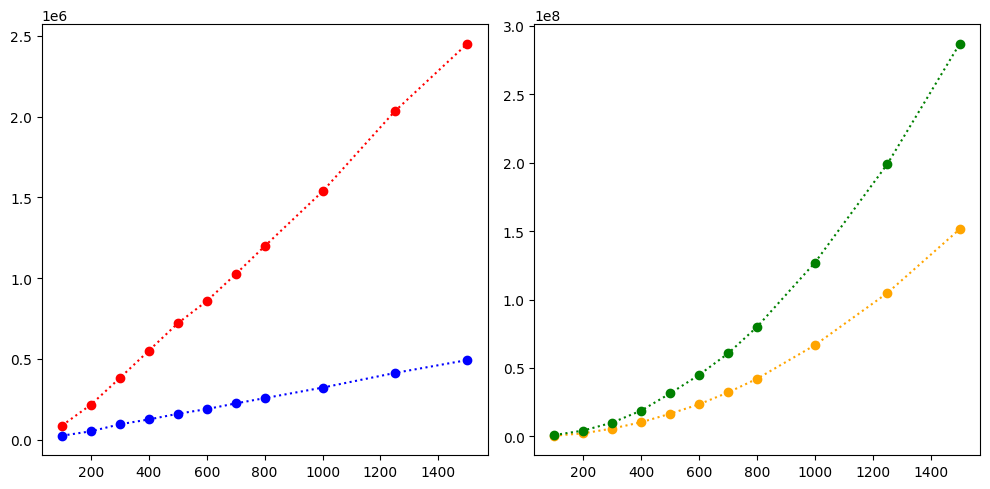

,Algorithms,dim: 100,dim: 200,dim: 300,dim: 400,dim: 500,dim: 600,dim: 700,dim: 800,dim: 1000,dim: 1250,dim: 1500
0,quicksort caso medio,86955,216112,381454,550253,719957,857181,1023929,1196815,1536061,2032818,2450261
1,countingsort k = n,24272,51497,94876,124711,159643,188970,223919,256576,321731,412532,492327
2,quicksort caso peggiore,535328,2263328,5765008,10380822,16586915,23490070,32148070,42126656,66729698,104779878,151438394
3,countingsort k = n^2,1000337,4309622,10118581,18918953,31460121,45000138,60648772,80056935,127024353,198970381,286824555


In [5]:
%store -r time_data

#grafici
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2)
ax1.plot(dims, [time_data["dim: " + str(dim)][0] for dim in dims], 'o:r')
ax1.plot(dims, [time_data["dim: " + str(dim)][1] for dim in dims], 'o:b')
ax2.plot(dims, [time_data["dim: " + str(dim)][2] for dim in dims], 'o:', c = "orange")
ax2.plot(dims, [time_data["dim: " + str(dim)][3] for dim in dims], 'o:g')
matplotlib.pyplot.show()

#tabella
df = pandas.DataFrame(data = time_data)
def pandas_color(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,0] = 'background-color: red; color: white; text-align: center'
    df.iloc[1,0] = 'background-color: blue; color: white; text-align: center'
    df.iloc[2,0] = 'background-color: orange; color: white; text-align: center'
    df.iloc[3,0] = 'background-color: green; color: white; text-align: center'
    return df
df.style.apply(pandas_color, axis = None)

Dall'osservazione dei dati raccolti possiamo constatare che c'è un riscontro di quanto predetto dall'analisi della complessità quantomeno nel rapporto fra le diverse casistiche. Possiamo evidentemente verificare che i casi peggiori sono di fatto più lenti nell'esecuzione (il secondo grafico ha l'asse delle ascisse di due ordini di magnitudo in più rispetto al primo) e in particolare sembrano avere un andamento quadratico. Il countingsort nel caso k = n ha un andamento lineare e tempi migliori del quicksort nel caso medio. 

Ad una prima analisi poi, possiamo osservare che l'andamento del quicksort nel caso medio sembra essere, al contrario da quanto atteso, lineare (sebbene sempre con costanti maggiori rispetto al countingsort con k = n). Le cause possono essere appunto la distribuzione dei dati e la loro finitezza.

Un ultima indagine, assolutamente non esaustiva è identificare con il metodo dei minimi quadrati la funzione che meglio approssima i dati ricavati. Questa analisi tuttavia non è completamente indicativa in quanto per equazioni di grado maggiore possiamo sempre trovare approssimazioni migliori.  

In [6]:
import numpy

def x_lsf(x, y):
    A = numpy.vstack([x, numpy.ones(len(x))]).T
    m, c = numpy.linalg.lstsq(A, y, rcond=None)[0]
    errors = [abs(y[i] - m*x[i]+c) for i in range(len(y))]
    return [0, m, c, errors]
    
def log_lsf(x, y):
    A = numpy.vstack([numpy.log(x), numpy.ones(len(x))]).T
    m, c = numpy.linalg.lstsq(A, y, rcond=None)[0]
    errors = [abs(y[i] - (m*numpy.log(x[i])+c)) for i in range(len(y))]
    return [0, m, c, errors]

def xlog_lsf(x, y):
    A = numpy.vstack([x*numpy.log(x), numpy.ones(len(x))]).T
    m, c = numpy.linalg.lstsq(A, y, rcond=None)[0]
    errors = [abs(y[i] - (m*x[i]*numpy.log(x[i])+c)) for i in range(len(y))]
    return [0, m, c, errors]

def x2_lsf(x, y):
    A = numpy.vander(x, 3)
    a, b, c = numpy.linalg.lstsq(A, y, rcond=None)[0]
    errors = [abs(y[i] - (a*x[i]**2+b*x[i]+c)) for i in range(len(y))]
    return [a, b, c, errors]

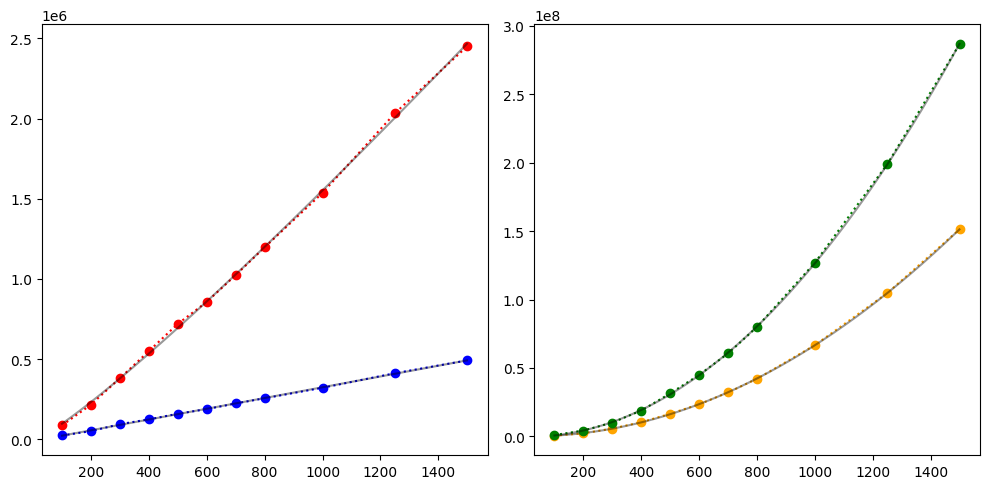

In [7]:
%store -r time_data

#grafici
density = [x for x in range(min(dims),max(dims))]
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2)
ax1.plot(dims, [time_data["dim: " + str(dim)][0] for dim in dims], 'o:r')
_, m, c, _ = xlog_lsf(dims, [time_data["dim: " + str(dim)][0] for dim in dims])
ax1.plot(density, [ m*x*numpy.log(x) + c for x in density], c= 'black', alpha = 0.4)
ax1.plot(dims, [time_data["dim: " + str(dim)][1] for dim in dims], 'o:b')
_, m, c, _ = x_lsf(dims, [time_data["dim: " + str(dim)][1] for dim in dims])
ax1.plot(density, [ m*x + c for x in density], c = 'black', alpha = 0.4)

ax2.plot(dims, [time_data["dim: " + str(dim)][2] for dim in dims], 'o:', c = 'orange')
a, b, c, _ = x2_lsf(dims, [time_data["dim: " + str(dim)][2] for dim in dims])
ax2.plot(density, [ a*x**2 + b*x + c for x in density], c = 'black', alpha = 0.4)
ax2.plot(dims, [time_data["dim: " + str(dim)][3] for dim in dims], 'o:g')
a, b, c, _ = x2_lsf(dims, [time_data["dim: " + str(dim)][3] for dim in dims])
ax2.plot(density, [ a*x**2 + b*x + c for x in density], c = 'black', alpha = 0.4)
matplotlib.pyplot.show()

### Verifica complessità spaziale

Come per l'analisi spaziale procederemo eseguendo i nostri test su _dataset_ di diverse dimensioni e per ciascuna dimensione eseguiremo diverse misurazioni per ammortizzare i casi eccezzionali dovuti alle distribuzioni pseudocasuali dei dati.
Le dimensioni su cui eseguiremo i test sono 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500 e 5000 elementi per array. E ripeteremo questi test 500 volte. I casi che andremo ad indagare sono: il quicksort nel caso medio e il countingsort con k = n. 

Setup tabella e grafici:

In [8]:
dims = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
n_try = 500

space_data = { 'Algorithms': ['quicksort caso medio', 'countingsort k = n'] }
for dim in dims:
    space_data["dim: " + str(dim)] = ["-"]*len(space_data['Algorithms'])

Per effettuare le nostre analisi useremo la libreria tracemalloc che tiene traccia delle porzioni di memoria allocate controllando ogni frazione di tempo la frazione di memoria allocata o deallocata e il picco massimo. La memoria viene misurata in "KiB" vale a dire KibiByte o $2^{10} = 1024$ Byte (non troppo distanti dai KiloByte $10^3 = 1000$ Byte).

Anche in questo caso l'esecuzione dei test può richiedere un notevole quantitativo di tempo, pertanto è possibile salvare e osservare i dati raccolti nell'ultima esecuzione del test seguendo le istruzioni commentate nel codice. 

In questo caso, più che nell'analisi temporale la generazione casuale di array potrebbe influenzare la complessità spaziale del countingsort quindi indipendentemente dai valori presenti nell'array generato casualmente useremo come valore massimo e quindi dimensione di C la dimensione del dataset analizzato e non l'effettivo elemento con valore massimo presente nell'array.

In [17]:
import tracemalloc

def exec_space(algorithm, array, parameter1, parameter2):
    tracemalloc.reset_peak()
    algorithm(array, parameter1, parameter2)
    size, peak = tracemalloc.get_traced_memory()
    return peak - size

#cambia a True se vuoi sovrascrivere i dati salvati nell'ultimo test
#cambia a False se vuoi usare i dati dell'ultimo test eseguito
if False: 
    tracemalloc.start()
    for dim in dims:
        average = [0]*2
        for _ in range(n_try):
            #quicksort caso medio
            average[0] += exec_space(quicksort,[random.randint(0,dim) for i in range(dim)],0,dim-1)
            #countingsort k = n
            average[1] += exec_space(countingsort,[random.randint(0,dim) for i in range(dim)],[0]*dim,dim)
        print("dim", dim, "done")
        for i in range(2):
            space_data["dim: " + str(dim)][i] = int(average[i]/n_try)
    tracemalloc.stop()
    %store space_data

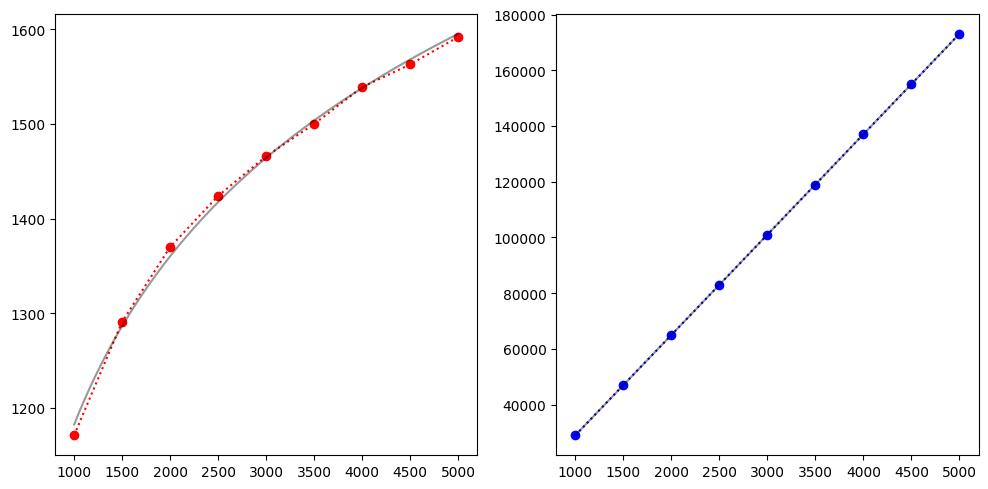

,Algorithms,dim: 1000,dim: 1500,dim: 2000,dim: 2500,dim: 3000,dim: 3500,dim: 4000,dim: 4500,dim: 5000
0,quicksort caso medio,1171,1291,1370,1424,1466,1500,1539,1563,1592
1,countingsort k = n,29020,47055,64998,83034,101012,119003,137025,155001,173043


In [10]:
%store -r space_data

#graphs
density = [x for x in range(min(dims),max(dims))]
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2)
ax1.plot(dims, [space_data["dim: " + str(dim)][0] for dim in dims], 'o:r')
_, m, c, _ = log_lsf(dims, [space_data["dim: " + str(dim)][0] for dim in dims])
ax1.plot(density, [m*numpy.log(x) + c for x in density], c = 'black', alpha = 0.4)
ax2.plot(dims, [space_data["dim: " + str(dim)][1] for dim in dims], 'o:b')
_, m, c, _ = x_lsf(dims, [space_data["dim: " + str(dim)][1] for dim in dims])
ax2.plot(density, [m*x + c for x in density], c = 'black', alpha = 0.4)
matplotlib.pyplot.show()

#table
df = pandas.DataFrame(data = space_data)
def pandas_color(x):
    df = x.copy()
    df.loc[:,:] = '' 
    df.iloc[0,0] = 'background-color: red; color: white; text-align: center'
    df.iloc[1,0] = 'background-color: blue; color: white; text-align: center'
    return df
df.style.apply(pandas_color, axis = None)

Come ci aspettavamo i dati sembrano rispettare gli andamenti previsti, di fatto il quicksort nel caso medio sembra procedere logaritmicamente mentre il countingsort con k = n linearmente.

### Verifica stabilità

Per l'analisi della stabilità possiamo facilmente costruire un test a costo di modificare leggermente gli algoritmi di ordinamento. Creeremo una struttura dati che memorizzi un valore e l'occorrenza di tale valore e i due algoritmi dovranno ordinare rispetto al primo dei due dati. Per verificarne la stabilità basterà quindi controllare che sia avvenuto l'ordinamento e anche l'ordine delle occorrenze sia rispettato.

In [11]:
class value:
    def __init__(self, value, occurrence = 0, color = ""):
        self.value = value
        self.occurrence = occurrence
        self.color = color

    def __str__(self): #debug purpose
        return str(self.value) + " " + str(self.occurrence) + ", "
    
    def copy(self):
        return value(self.value, self.occurrence, self.color)
    
    def swap(self, other):
        self.value, other.value = other.value, self.value
        self.occurrence, other.occurrence = other.occurrence, self.occurrence
        self.color, other.color = other.color, self.color

In [12]:
def stability_countingsort(array):
    maxValue = array[0].value
    for elm in array:
        if elm.value > maxValue:
            maxValue = elm.value
    count = [0] * (maxValue + 1)
    result = [None]*len(array)
    for elm in array:
        count[elm.value] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    for i in range(len(array)-1, -1, -1):        
        count[array[i].value] -= 1
        result[count[array[i].value]] = array[i].copy()
    for i in range(len(array)):
        array[i] = result[i].copy()

In [13]:
def stability_quicksort(arr):
    _stability_quicksort(arr, 0, len(arr) - 1)

def _stability_quicksort(arr, low, high):
    if low < high:
        pivot_index = _stability_partition(arr, low, high)
        _stability_quicksort(arr, low, pivot_index - 1)
        _stability_quicksort(arr, pivot_index + 1, high)

def _stability_partition(arr, low, high):
    pivot = arr[high].value
    i = low - 1
    for j in range(low, high):
        if arr[j].value <= pivot:
            i += 1
            arr[i].swap(arr[j])

    arr[i + 1].swap(arr[high])
    return i + 1

In [14]:
def lerp_color(start_color, end_color, t):
    start_r, start_g, start_b = int(start_color[1:3], 16), int(start_color[3:5], 16), int(start_color[5:7], 16)
    end_r, end_g, end_b = int(end_color[1:3], 16), int(end_color[3:5], 16), int(end_color[5:7], 16)
    
    lerped_r = max(0, min(int((1 - t) * start_r + t * end_r), 255))
    lerped_g = max(0, min(int((1 - t) * start_g + t * end_g), 255))
    lerped_b = max(0, min(int((1 - t) * start_b + t * end_b), 255))
        
    lerped_color = f"#{lerped_r:02X}{lerped_g:02X}{lerped_b:02X}"
    
    return lerped_color

In [15]:
n_try = 100
n_set = 3
try_size = 256
n_occurrance = [0]*n_set
array_sample = []

def test_stability(algorithm):
    for i in range(n_try):
        n_occurrance = [0]*n_set
        array = []
        for x in range(try_size):
            r = random.randint(0,n_set-1)
            array.append(value(r,n_occurrance[r],lerp_color("#ffcc00","#0066ff",n_occurrance[r]*n_set/try_size)))
            n_occurrance[r] += 1
        algorithm(array)
        for i in range(1, len(array)):
            if array[i].value < array[i-1].value:
                print("not a sorting algorithm")
                return False
            if array[i].value == array[i-1].value and array[i].occurrence < array[i-1].occurrence:
                array_sample.append(array)
                return False
        array_sample.append(array)
        return True

print("quicksort stability:", str(test_stability(stability_quicksort)))
print("countingsort stability:", str(test_stability(stability_countingsort)))

quicksort stability: False
countingsort stability: True


Come ci aspettavamo il quicksort non risulta stabile mentre il countingo sort si. Possiamo visualizzare graficamente l'ordine finale dei dati associando una variazione di colore dal giallo al blu alle varie occorrenze.

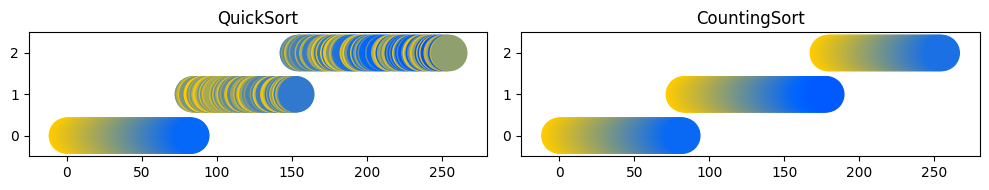

In [16]:
matplotlib.pyplot.rcParams["figure.figsize"] = [10,2]

fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2)
ax1.set_title("QuickSort")
ax1.scatter([x for x in range(try_size)], 
            [array_sample[0][x].value for x in range(try_size)], 
            s = 640, 
            c = [array_sample[0][x].color for x in range(try_size)])
ax1.margins(0.1,0.25)

ax2.set_title("CountingSort")
ax2.scatter([x for x in range(try_size)], 
            [array_sample[1][x].value for x in range(try_size)],
            s = 640,
            c = [array_sample[1][x].color for x in range(try_size)])
ax2.margins(0.1,0.25)
matplotlib.pyplot.show()

Il countingsort ripetta la tinta cromatica che ci aspettavamo mentre il quicksort inaspettatamente pare essere stabile per il valore minore e instabile per i restanti valori. 